In [49]:
# import the required libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, silhouette_score

In [2]:
# load the dataset
iris = pd.read_csv('Iris.csv')

In [9]:
X = iris[['PetalLengthCm','SepalWidthCm']].values.reshape(-1,2)

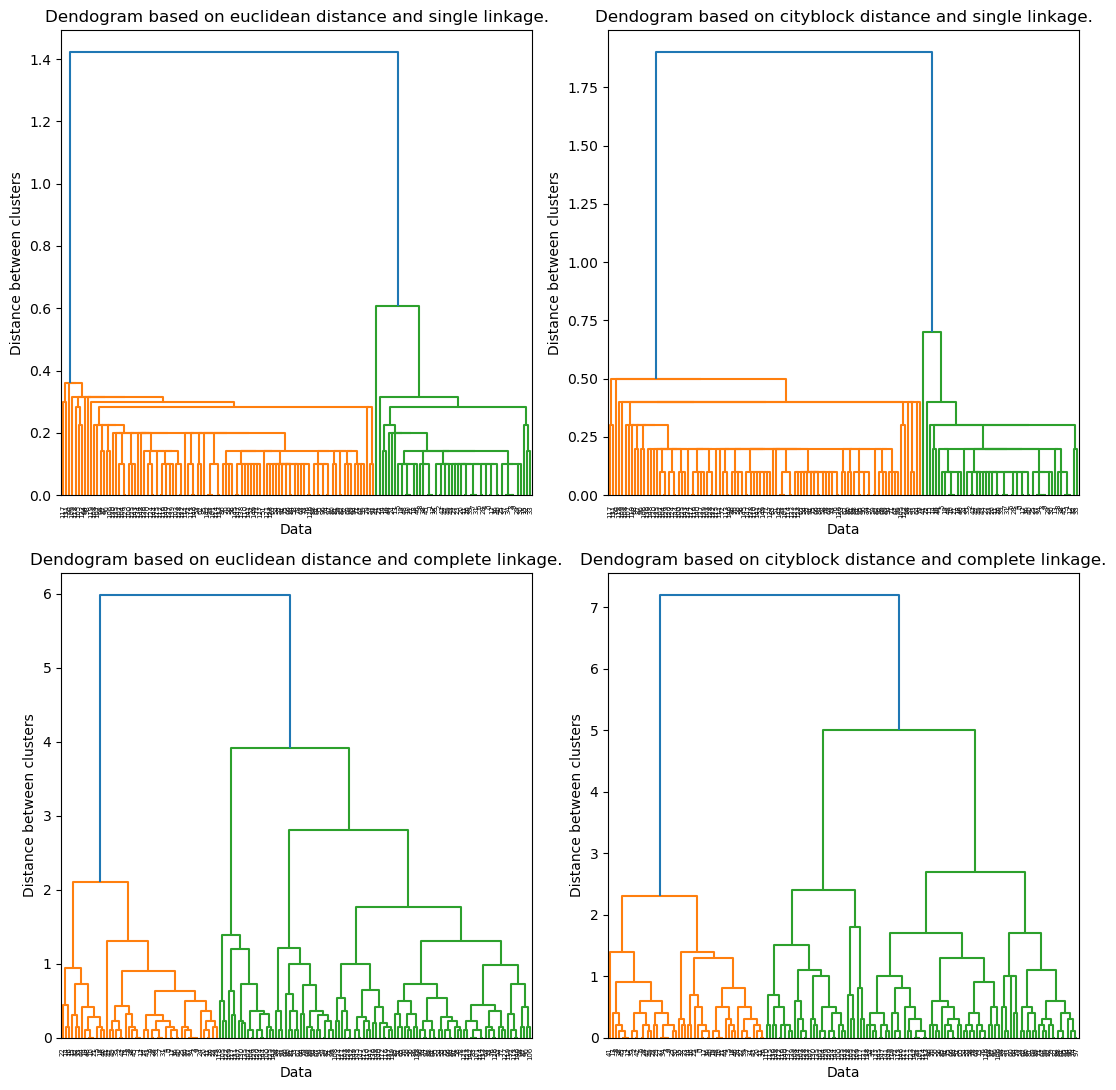

In [71]:
# generate 4 dendograms that use single and complete linkages, and Euclidean and Cityblock distance
linkages = ['single','complete']
distance = ['euclidean','cityblock']
fig,axes = plt.subplots(2,2,figsize=(11, 11))

for link_index,link_value in enumerate(linkages):
    for dist_index,dist_value in enumerate(distance):
        # run the unsupervised 
        link = linkage(y = X, method=link_value, metric = dist_value)
        dend = dendrogram(link, ax = axes[link_index,dist_index]) 
        # formatting
        axes[link_index,dist_index].set_title(f'Dendogram based on {dist_value} distance and {link_value} linkage.')
        axes[link_index,dist_index].set_xlabel('Data')
        axes[link_index,dist_index].set_ylabel('Distance between clusters')
        plt.tight_layout()
    

### Interpretation
Based on all of the charts, I can see that there are two vertical lines with the greatest distance indicating that there should be 2 main clusters as these are the most dissimilar clusters. Since the complete linkage method is preferable to single linkage as single linkage creates a link between all data points, we choose this method. Secondly we will continue with the euclidean distance metric as it is easy to understand.

Number of clusters = 2

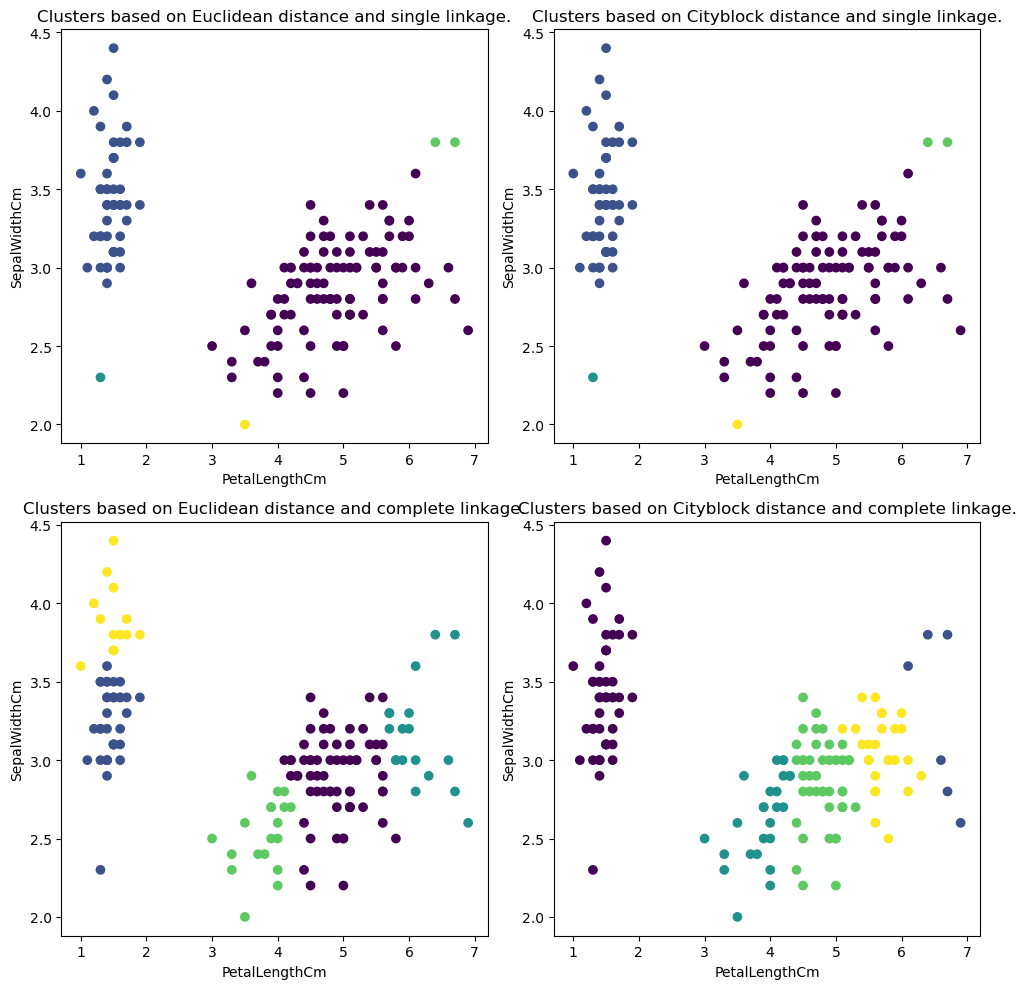

In [69]:
# Please note this is not part of the solution, I just wanted to practice data visualisation skills.
# generate 4 scatterplots that use single and complete linkages, and Euclidean and Cityblock distance
k = 5
linkage = ['single','complete']
distance = ['Euclidean','Cityblock']
fig,axes = plt.subplots(2,2,figsize=(10, 10))

for link_index,link_value in enumerate(linkage):
    for dist_index,dist_value in enumerate(distance):
        # run the unsupervised 
        cluster = AgglomerativeClustering(n_clusters=k, affinity= dist_value, linkage=link_value)
        cluster.fit_predict(X)
        # plot the scatterplot
        axes[link_index,dist_index].scatter(X[:,0], X[:,1], c=cluster.labels_)
        # formatting
        axes[link_index,dist_index].set_title(f'Clusters based on {dist_value} distance and {link_value} linkage.')
        axes[link_index,dist_index].set_xlabel('PetalLengthCm')
        axes[link_index,dist_index].set_ylabel('SepalWidthCm')
        plt.tight_layout()
    

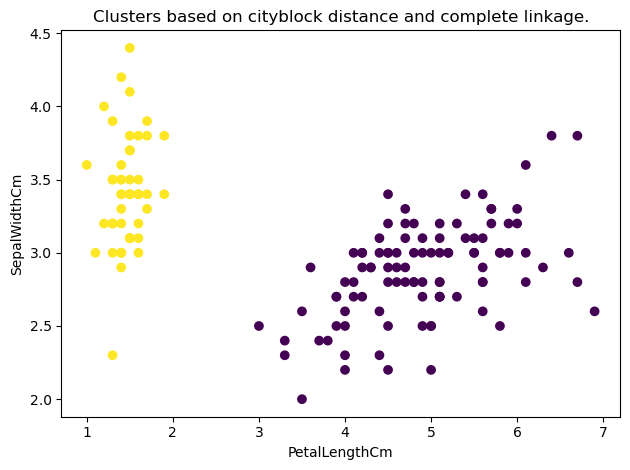

In [74]:
# agglomerative hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity= 'Euclidean', linkage='complete')
pred = cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
plt.title(f'Clusters based on {dist_value} distance and {link_value} linkage.')
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalWidthCm')
plt.tight_layout()
plt.show()

In [80]:
# Clustering Evaluation & Interpretation
print(f"""The Silouette score for euclidean, complete agglomerative clustering is with 2 clusters is {silhouette_score(X, labels = pred,metric = 'euclidean')}.
This is close to 1 which indicates that the clusters are well defined with lower levels of overlapping.""")

The Silouette score for euclidean, complete agglomerative clustering is with 2 clusters is 0.7405373477981034.
This is close to 1 which indicates that the clusters are well defined with lower levels of overlapping.
